In [21]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd



In [22]:
#df_CDFI = pd.read_csv(r"C:\Users\saust\OneDrive - Sasol\1 Project rC4\Jupyter Notebooks\Report 10-19-23\df_AlConCD554.csv")
# F1 is used to compare before and after
df_CDFI1 = pd.read_csv(r"C:\Users\saust\OneDrive\Desktop\CodeSpace DLs\102423\Project rC4\5 Engineered Features\2 - EF - Final Machine Preprocess\df_CDOH.csv")


# df_CDFI = pd.read_csv('/workspaces/codespaces-jupyter/Final Machine/Interpolated LIMS/df_CDOH.csv')


In [23]:
# Set max columns to display
pd.set_option('display.max_columns', None)

In [24]:
df_CDFI1.describe()

,425 %Al,Butanol,Decanol,AYC55580,DI55102,DI55152,DI55580,FC42428,FC55003,FC55009,FC55102,FC55152,FC55552,FC55555,FC55569,FC55576,FFC55553,FFC55555,FYC55553,LC55553,LC55555,LC55557,LC55568,TC55552,TC55553,TC55555,TI55013,TI55014,TI55015,TI55016,TI55017,TI55021,TI55023
count,56692.000000,56692.000000,56692.000000,56692.000000,56692.000000,56692.000000,56692.000000,56692.000000,56692.000000,5.669200e+04,56692.000000,56692.000000,56692.000000,56692.000000,56692.000000,56692.000000,56692.000000,56692.000000,56692.000000,56692.000000,56692.000000,56692.000000,56692.000000,56692.000000,56692.000000,56692.000000,56692.000000,56692.000000,56692.000000,56692.000000,56692.000000,56692.000000,56692.000000
mean,6.102568,10.159097,2.783139,11.190763,0.929183,0.948213,0.998448,34949.282507,5943.587725,8.642095e+02,44454.232553,40322.298418,35943.898723,27838.228893,6542.683482,423.616848,0.983235,0.774375,35311.748813,63.743198,59.583652,69.335227,40.721731,167.848708,182.968327,181.033535,202.065783,198.001684,195.621123,190.901237,186.704144,223.571121,218.923414
std,0.307167,10.766912,1.600426,4.140405,0.066439,0.043248,0.044181,5665.289174,836.963231,5.951287e+02,6565.359850,5678.432470,4437.551046,3535.683915,380.329468,260.435270,0.056070,0.021944,4632.175030,6.403442,10.709861,3.271572,1.660907,15.014702,27.965747,1.495460,17.610521,13.633101,13.590375,9.102679,9.778964,9.366356,4.063504
min,4.573810,0.010000,0.000976,0.000862,0.794535,0.820425,0.860904,14573.800000,2925.430000,3.150000e-18,20039.100000,19146.400000,18590.000000,14214.900000,5096.080000,0.000548,0.265390,0.694477,17321.200000,43.548000,27.970000,59.038000,31.616100,119.869000,110.534000,175.746000,152.818000,161.810000,158.581000,164.278000,159.702000,206.365000,206.472000
25%,5.969493,3.725195,1.493330,9.382740,0.889793,0.917749,0.967603,31670.025000,5425.580000,4.091148e+02,40968.975000,38155.075000,34869.500000,26770.325000,6295.522500,244.604000,0.959998,0.759903,33117.150000,61.246825,49.938100,66.227375,40.100000,156.235000,162.691750,179.971000,187.962000,187.148750,184.999750,183.515750,179.370000,217.963000,215.731000
50%,6.120565,5.920780,2.560000,10.709550,0.938533,0.942326,0.995945,37037.650000,5963.340000,8.416325e+02,45941.200000,41440.150000,37688.050000,28947.000000,6529.010000,379.134000,0.988710,0.778141,36832.650000,65.277550,61.884700,69.966300,41.081550,170.625000,177.601500,180.142000,200.253500,196.757000,194.396000,189.936000,185.770500,221.217000,218.255500
75%,6.267622,11.642100,3.863330,12.928750,0.979955,0.974824,1.027960,39151.750000,6506.837500,1.317453e+03,48822.325000,43872.400000,38952.225000,30036.300000,6767.337500,617.744000,1.010652,0.789695,38552.225000,67.964225,68.106400,71.768800,41.480300,179.313000,202.014250,182.027000,214.675250,207.498250,205.106500,197.160250,193.388250,225.275000,221.765000
max,7.571230,60.346700,7.923330,23.835600,1.068230,1.065410,1.125220,49372.900000,8973.580000,2.655410e+03,62848.200000,58808.700000,46356.900000,34638.100000,8014.950000,1206.820000,1.475490,0.853283,50427.700000,82.753500,85.261600,79.508200,49.295100,207.426000,261.360000,186.453000,250.439000,234.651000,233.318000,216.644000,212.051000,260.685000,232.208000


In [25]:
column_counts = df_CDFI1.columns.value_counts()
total_counts = column_counts.sum()
print(total_counts)

34


In [26]:

# List of columns to exclude to run XGboost feature selection
exclude_columns = ["Date", "Decanol"]

# Temporarily save the excluded columns
temp_exclude = df_CDFI1[exclude_columns]

# Create a new DataFrame without the excluded columnsd
df_CDFI = df_CDFI1.drop(columns=exclude_columns)



In [27]:
# # List of columns to exclude
# columns_to_exclude = [
#     'FC52018_1dAvg', 'FC55003_1dAvg', 'FC55009_1dAvg', 'FC55102_1dAvg',
#     'FC55152_1dAvg', 'FC55552_1dAvg', 'FC55569_1dAvg', 'FC55576_1dAvg',
#     'FFC55553_1dAvg', 'FFC55555_1dAvg', 'FYC55553_1dAvg', 'LC52572_1dAvg',
#     'LC55553_1dAvg', 'LC55555_1dAvg', 'LC55557_1dAvg', 'LC55568_1dAvg',
#     'LC90366_1dAvg', 'LC90368_1dAvg', 'TC52015_1dAvg', 'TC55552_1dAvg',
#     'TC55553_1dAvg', 'TC55555_1dAvg', 'TC55566_1dAvg', 'TI40050_1dAvg',
#     'PI55004_1dAvg', 'PI55020_1dAvg', 'TI52014_1dAvg', 'VI52558B_1dAvg',
#     'PI55004', 'PI55020', 'PI55560', 'TI40050', 'FC55009'
# ]

# # Filter columns based on exclusion list
# columns_to_include = [col for col in df_CDFI_noStr.columns if col not in columns_to_exclude]

# # Create a new DataFrame with included columns
# df_CDFI_noAvg = df_CDFI_noStr[columns_to_include]

# # Print descriptive statistics for df_CDFI
# print(df_CDFI_noAvg.describe())



In [28]:
# print(df_CDFI_noAvg.columns)

# # Save DataFrame to CSV file in the same directory as the Jupyter Notebook
# df_CDFI_noAvg.to_csv('df_CDFI_noAvg.csv', index=False)


In [29]:
X = df_CDFI.drop('Butanol', axis=1)  # Replace 'target' with the actual name of your target column
y = df_CDFI['Butanol']  # Replace 'target' with the actual name of your target column


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [31]:
model = xgb.XGBRegressor(objective ='reg:squarederror')
model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [32]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")



Mean Squared Error: 32.14076350774878


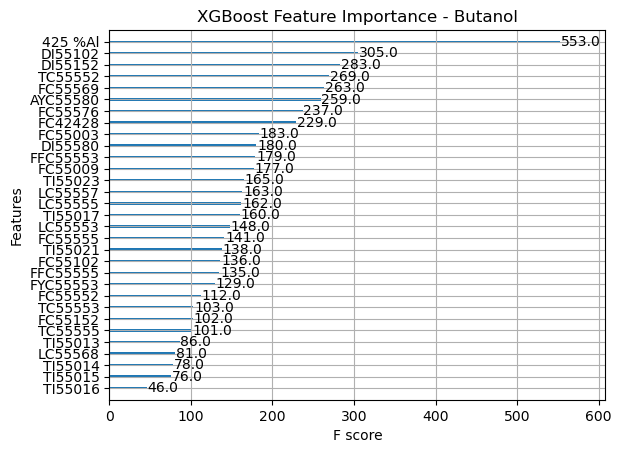

In [33]:
xgb.plot_importance(model)
plt.title("XGBoost Feature Importance - Butanol")
plt.show()


In [34]:

# Extract feature importances from the model
feature_importances = model.get_booster().get_score(importance_type="weight")

# Convert the dictionary to a DataFrame and sort by importance
df_importance = pd.DataFrame(list(feature_importances.items()), columns=['Feature', 'Importance']).sort_values(by='Importance', ascending=False)



df_importance.to_csv('FScore_on_Butanol_310.csv', index=False)

In [35]:
num_columns = df_importance.shape[0]
print("Number of rows:", num_columns)

Number of rows: 31


In [36]:
# Display the DataFrame
df_importance

,Feature,Importance
0,425 %Al,553.0
2,DI55102,305.0
3,DI55152,283.0
21,TC55552,269.0
12,FC55569,263.0
1,AYC55580,259.0
13,FC55576,237.0
5,FC42428,229.0
6,FC55003,183.0
4,DI55580,180.0


In [37]:
# Extract the feature names you want to keep from df_importance
features_to_keep = df_importance['Feature'].tolist()

# Filter df_CDFI using these features
df_CDFI = df_CDFI[features_to_keep]

# Add back the excluded columns to df_CDFI
df_CDFI = pd.concat([y, df_CDFI, temp_exclude], axis=1)

In [38]:
df_CDFI.describe()

,Butanol,425 %Al,DI55102,DI55152,TC55552,FC55569,AYC55580,FC55576,FC42428,FC55003,DI55580,FFC55553,FC55009,TI55023,LC55557,LC55555,TI55017,LC55553,FC55555,TI55021,FC55102,FFC55555,FYC55553,FC55552,TC55553,FC55152,TC55555,TI55013,LC55568,TI55014,TI55015,TI55016,Decanol
count,56692.000000,56692.000000,56692.000000,56692.000000,56692.000000,56692.000000,56692.000000,56692.000000,56692.000000,56692.000000,56692.000000,56692.000000,5.669200e+04,56692.000000,56692.000000,56692.000000,56692.000000,56692.000000,56692.000000,56692.000000,56692.000000,56692.000000,56692.000000,56692.000000,56692.000000,56692.000000,56692.000000,56692.000000,56692.000000,56692.000000,56692.000000,56692.000000,56692.000000
mean,10.159097,6.102568,0.929183,0.948213,167.848708,6542.683482,11.190763,423.616848,34949.282507,5943.587725,0.998448,0.983235,8.642095e+02,218.923414,69.335227,59.583652,186.704144,63.743198,27838.228893,223.571121,44454.232553,0.774375,35311.748813,35943.898723,182.968327,40322.298418,181.033535,202.065783,40.721731,198.001684,195.621123,190.901237,2.783139
std,10.766912,0.307167,0.066439,0.043248,15.014702,380.329468,4.140405,260.435270,5665.289174,836.963231,0.044181,0.056070,5.951287e+02,4.063504,3.271572,10.709861,9.778964,6.403442,3535.683915,9.366356,6565.359850,0.021944,4632.175030,4437.551046,27.965747,5678.432470,1.495460,17.610521,1.660907,13.633101,13.590375,9.102679,1.600426
min,0.010000,4.573810,0.794535,0.820425,119.869000,5096.080000,0.000862,0.000548,14573.800000,2925.430000,0.860904,0.265390,3.150000e-18,206.472000,59.038000,27.970000,159.702000,43.548000,14214.900000,206.365000,20039.100000,0.694477,17321.200000,18590.000000,110.534000,19146.400000,175.746000,152.818000,31.616100,161.810000,158.581000,164.278000,0.000976
25%,3.725195,5.969493,0.889793,0.917749,156.235000,6295.522500,9.382740,244.604000,31670.025000,5425.580000,0.967603,0.959998,4.091148e+02,215.731000,66.227375,49.938100,179.370000,61.246825,26770.325000,217.963000,40968.975000,0.759903,33117.150000,34869.500000,162.691750,38155.075000,179.971000,187.962000,40.100000,187.148750,184.999750,183.515750,1.493330
50%,5.920780,6.120565,0.938533,0.942326,170.625000,6529.010000,10.709550,379.134000,37037.650000,5963.340000,0.995945,0.988710,8.416325e+02,218.255500,69.966300,61.884700,185.770500,65.277550,28947.000000,221.217000,45941.200000,0.778141,36832.650000,37688.050000,177.601500,41440.150000,180.142000,200.253500,41.081550,196.757000,194.396000,189.936000,2.560000
75%,11.642100,6.267622,0.979955,0.974824,179.313000,6767.337500,12.928750,617.744000,39151.750000,6506.837500,1.027960,1.010652,1.317453e+03,221.765000,71.768800,68.106400,193.388250,67.964225,30036.300000,225.275000,48822.325000,0.789695,38552.225000,38952.225000,202.014250,43872.400000,182.027000,214.675250,41.480300,207.498250,205.106500,197.160250,3.863330
max,60.346700,7.571230,1.068230,1.065410,207.426000,8014.950000,23.835600,1206.820000,49372.900000,8973.580000,1.125220,1.475490,2.655410e+03,232.208000,79.508200,85.261600,212.051000,82.753500,34638.100000,260.685000,62848.200000,0.853283,50427.700000,46356.900000,261.360000,58808.700000,186.453000,250.439000,49.295100,234.651000,233.318000,216.644000,7.923330


In [39]:

# If you want to save df_CDFI to a .csv file:
df_CDFI.to_csv('df_CDFI.csv', index=False)

In [40]:
column_counts = df_CDFI.columns.value_counts()
total_counts = column_counts.sum()
print(total_counts)


34
